In [20]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [30]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [2]:
iris = load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
data_classes = iris.target

In [11]:
iris_cuted = iris_df.drop(columns=['petal length (cm)', 'petal width (cm)'])
iris_cuted

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris_cuted, data_classes, test_size=0.3)

In [15]:
lda = LinearDiscriminantAnalysis() #Объявляем образец класса
lda.fit(X_train, y_train) #Обучаем объект линейного дисперсионного анализа

LinearDiscriminantAnalysis()

In [16]:
type(lda)

sklearn.discriminant_analysis.LinearDiscriminantAnalysis

In [18]:
lda.predict(X_test) #Прогноз обученной модели на тестовой выборке

array([1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0, 0, 1, 2,
       2, 0, 2, 0, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 2,
       0])

In [19]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T #Сравниваем результат предсказания модели и фактическую классификацию
result

,0,1
0,1,1
1,0,0
2,1,1
3,1,1
4,2,1
5,0,0
6,1,2
7,0,0
8,1,1
9,0,0


### На удивление много ошибок 

In [22]:
accuracy_score(y_test, lda.predict(X_test))

0.8

### Не самый лучший процент, может стоило сделать обучающую выборку побольше

In [24]:
lda.coef_

array([[-6.01855588,  8.28173661],
       [ 1.70960343, -3.71170767],
       [ 4.46648876, -4.62204841]])

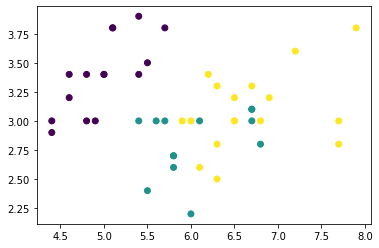

In [25]:
plt.scatter(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], c=y_test)
plt.show()

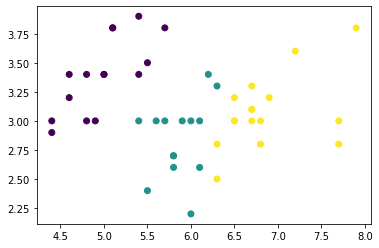

In [26]:
plt.scatter(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], c=lda.predict(X_test))
plt.show()

### Да предективная модель и то логичнее выглядит, теперь понимаю почему у нее такая точность, проблема в том что извлекая только часть данных из датафрейма классификация очень страдает. Предположу что X1 X2 X3 X4 Примерно равнозначно коррелируют с Y (классом) и может неплохо коррелируют между собой (0.3-0.4) ширина листка чем больше тем больше длинна 

/home/max/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


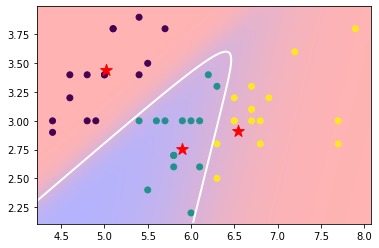

In [31]:
# сам scatter plot
plt.scatter(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], c=lda.predict(X_test))
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

### Красиво, жаль непонятено как подкорректировать для 3 цветов

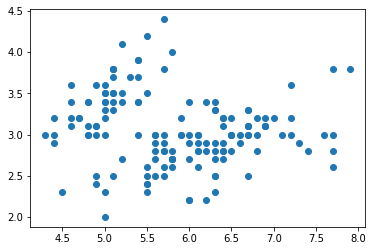

In [27]:
plt.scatter(x=iris_cuted['sepal length (cm)'], y=iris_cuted['sepal width (cm)'])

In [36]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(iris_cuted)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

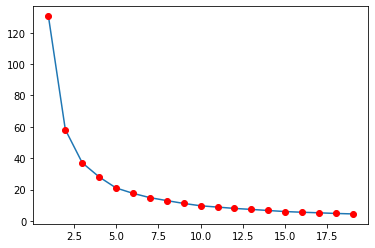

In [37]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

### Ну меньше 3 и больше трех как то менее привлекательно

In [39]:
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(iris_cuted)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

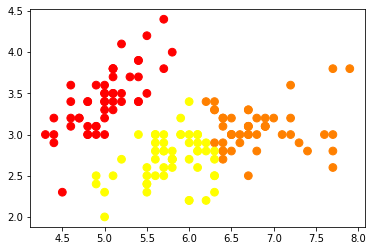

In [43]:
plt.scatter(iris_cuted.iloc[:, 0], iris_cuted.iloc[:, 1], cmap='autumn', c=clusters, s=60)

In [46]:
a1_train, a1_test, a2_train, a2_test, a3_train, a3_test, a4_train, a4_test = train_test_split(iris_df, data_classes, test_size=0.3)

ValueError: not enough values to unpack (expected 8, got 4)

# P.s. Очень хотел сделать классификацию по всем 4 параметрам листа (т.е. обучающие и тестовые выбокри по 4 мерному пространству) но ничего не нашел, напишите пожалуйста возможно ли это и если да как это сделать?